<a href="https://colab.research.google.com/github/gony25/-2/blob/master/%D0%94%D0%97-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.1/spark-2.4.1-bin-hadoop2.7.tgz
!tar -xvf spark-2.4.1-bin-hadoop2.7.tgz
!pip install -q findspark

spark-2.4.1-bin-hadoop2.7/
spark-2.4.1-bin-hadoop2.7/jars/
spark-2.4.1-bin-hadoop2.7/jars/breeze-macros_2.11-0.13.2.jar
spark-2.4.1-bin-hadoop2.7/jars/hadoop-yarn-client-2.7.3.jar
spark-2.4.1-bin-hadoop2.7/jars/stream-2.7.0.jar
spark-2.4.1-bin-hadoop2.7/jars/calcite-core-1.2.0-incubating.jar
spark-2.4.1-bin-hadoop2.7/jars/orc-core-1.5.5-nohive.jar
spark-2.4.1-bin-hadoop2.7/jars/machinist_2.11-0.6.1.jar
spark-2.4.1-bin-hadoop2.7/jars/spark-kubernetes_2.11-2.4.1.jar
spark-2.4.1-bin-hadoop2.7/jars/spark-unsafe_2.11-2.4.1.jar
spark-2.4.1-bin-hadoop2.7/jars/jersey-media-jaxb-2.22.2.jar
spark-2.4.1-bin-hadoop2.7/jars/jackson-module-jaxb-annotations-2.6.7.jar
spark-2.4.1-bin-hadoop2.7/jars/minlog-1.3.0.jar
spark-2.4.1-bin-hadoop2.7/jars/hadoop-auth-2.7.3.jar
spark-2.4.1-bin-hadoop2.7/jars/jersey-client-2.22.2.jar
spark-2.4.1-bin-hadoop2.7/jars/xz-1.5.jar
spark-2.4.1-bin-hadoop2.7/jars/javolution-5.5.1.jar
spark-2.4.1-bin-hadoop2.7/jars/jta-1.1.jar
spark-2.4.1-bin-hadoop2.7/jars/pyrolite-4.13.

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.1-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

In [5]:
df = spark.createDataFrame([{"hello": "world"} for x in range(1000)])
df.show(3)

/content/spark-2.4.1-bin-hadoop2.7/python/pyspark/sql/session.py:346: UserWarning: inferring schema from dict is deprecated,please use pyspark.sql.Row instead
  warnings.warn("inferring schema from dict is deprecated,"


+-----+
|hello|
+-----+
|world|
|world|
|world|
+-----+
only showing top 3 rows



In [0]:
from pyspark.sql import SparkSession

In [0]:
spark = SparkSession.builder.getOrCreate()

In [0]:
df = spark.read.csv("train.csv", header=True)


In [9]:

df.printSchema()

root
 |-- Id: string (nullable = true)
 |-- MSSubClass: string (nullable = true)
 |-- MSZoning: string (nullable = true)
 |-- LotFrontage: string (nullable = true)
 |-- LotArea: string (nullable = true)
 |-- Street: string (nullable = true)
 |-- Alley: string (nullable = true)
 |-- LotShape: string (nullable = true)
 |-- LandContour: string (nullable = true)
 |-- Utilities: string (nullable = true)
 |-- LotConfig: string (nullable = true)
 |-- LandSlope: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Condition1: string (nullable = true)
 |-- Condition2: string (nullable = true)
 |-- BldgType: string (nullable = true)
 |-- HouseStyle: string (nullable = true)
 |-- OverallQual: string (nullable = true)
 |-- OverallCond: string (nullable = true)
 |-- YearBuilt: string (nullable = true)
 |-- YearRemodAdd: string (nullable = true)
 |-- RoofStyle: string (nullable = true)
 |-- RoofMatl: string (nullable = true)
 |-- Exterior1st: string (nullable = true)
 |-- Exteri

In [10]:
df.select('SalePrice').show(10)

+---------+
|SalePrice|
+---------+
|   208500|
|   181500|
|   223500|
|   140000|
|   250000|
|   143000|
|   307000|
|   200000|
|   129900|
|   118000|
+---------+
only showing top 10 rows



In [11]:
df.select('Foundation').show(10)

+----------+
|Foundation|
+----------+
|     PConc|
|    CBlock|
|     PConc|
|    BrkTil|
|     PConc|
|      Wood|
|     PConc|
|    CBlock|
|    BrkTil|
|    BrkTil|
+----------+
only showing top 10 rows



In [12]:
df.select(df['SalePrice'] + 2).show(10)

+---------------+
|(SalePrice + 2)|
+---------------+
|       208502.0|
|       181502.0|
|       223502.0|
|       140002.0|
|       250002.0|
|       143002.0|
|       307002.0|
|       200002.0|
|       129902.0|
|       118002.0|
+---------------+
only showing top 10 rows



In [13]:
df.select(df['SalePrice'] * 2).show(10)

+---------------+
|(SalePrice * 2)|
+---------------+
|       417000.0|
|       363000.0|
|       447000.0|
|       280000.0|
|       500000.0|
|       286000.0|
|       614000.0|
|       400000.0|
|       259800.0|
|       236000.0|
+---------------+
only showing top 10 rows



In [14]:
df.filter(df['YearBuilt'] > 2000).select('Id').show(8)

+---+
| Id|
+---+
|  1|
|  3|
|  7|
| 12|
| 14|
| 19|
| 21|
| 23|
+---+
only showing top 8 rows



In [15]:
df.filter(df['YearBuilt'] > 2000).filter(df['YearBuilt'] > 2000)

DataFrame[Id: string, MSSubClass: string, MSZoning: string, LotFrontage: string, LotArea: string, Street: string, Alley: string, LotShape: string, LandContour: string, Utilities: string, LotConfig: string, LandSlope: string, Neighborhood: string, Condition1: string, Condition2: string, BldgType: string, HouseStyle: string, OverallQual: string, OverallCond: string, YearBuilt: string, YearRemodAdd: string, RoofStyle: string, RoofMatl: string, Exterior1st: string, Exterior2nd: string, MasVnrType: string, MasVnrArea: string, ExterQual: string, ExterCond: string, Foundation: string, BsmtQual: string, BsmtCond: string, BsmtExposure: string, BsmtFinType1: string, BsmtFinSF1: string, BsmtFinType2: string, BsmtFinSF2: string, BsmtUnfSF: string, TotalBsmtSF: string, Heating: string, HeatingQC: string, CentralAir: string, Electrical: string, 1stFlrSF: string, 2ndFlrSF: string, LowQualFinSF: string, GrLivArea: string, BsmtFullBath: string, BsmtHalfBath: string, FullBath: string, HalfBath: string, 

In [17]:
df.filter(df['SalePrice']).filter(df['YearBuilt'] > 5000).select('Id').show(10)

AnalysisException: ignored

In [18]:
df.select('SalePrice').show(10)

+---------+
|SalePrice|
+---------+
|   208500|
|   181500|
|   223500|
|   140000|
|   250000|
|   143000|
|   307000|
|   200000|
|   129900|
|   118000|
+---------+
only showing top 10 rows



In [19]:
df.filter(df['SalePrice'] > 100000).filter(df['SalePrice'] < 200000).count()

902

In [20]:
for column in df.columns:
    print(df.select(column).show(2))

+---+
| Id|
+---+
|  1|
|  2|
+---+
only showing top 2 rows

None
+----------+
|MSSubClass|
+----------+
|        60|
|        20|
+----------+
only showing top 2 rows

None
+--------+
|MSZoning|
+--------+
|      RL|
|      RL|
+--------+
only showing top 2 rows

None
+-----------+
|LotFrontage|
+-----------+
|         65|
|         80|
+-----------+
only showing top 2 rows

None
+-------+
|LotArea|
+-------+
|   8450|
|   9600|
+-------+
only showing top 2 rows

None
+------+
|Street|
+------+
|  Pave|
|  Pave|
+------+
only showing top 2 rows

None
+-----+
|Alley|
+-----+
|   NA|
|   NA|
+-----+
only showing top 2 rows

None
+--------+
|LotShape|
+--------+
|     Reg|
|     Reg|
+--------+
only showing top 2 rows

None
+-----------+
|LandContour|
+-----------+
|        Lvl|
|        Lvl|
+-----------+
only showing top 2 rows

None
+---------+
|Utilities|
+---------+
|   AllPub|
|   AllPub|
+---------+
only showing top 2 rows

None
+---------+
|LotConfig|
+---------+
|   Inside|
|   

In [21]:
df.select('Neighborhood').distinct().count()

25

In [22]:
df.select('street').distinct().count()

2

In [23]:
df.select('Yrsold').distinct().count()

5

In [0]:
from pyspark.sql.functions import mean, stddev, col

In [0]:
df_stats = df.select(
    mean(col('SalePrice')).alias('mean'),
    stddev(col('SalePrice')).alias('std')
).collect()

In [26]:
df_stats

[Row(mean=180921.19589041095, std=79442.50288288663)]

In [27]:
df.select(mean(col('SalePrice')).alias('mean')).collect()

[Row(mean=180921.19589041095)]

In [28]:
# построение корреляции
import pandas as pd
df = pd.read_csv("train.csv")
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [29]:
df.corr(method = 'pearson')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [37]:
pearson = df.corr(method = 'pearson')
corr_with_target = pearson.iloc[1][:1]
corr_with_target[abs(corr_with_target).argsort()[::1]]

Id    0.011156
Name: MSSubClass, dtype: float64

In [0]:
import numpy as np
import matplotlib.pyplot as plt

ValueError: ignored

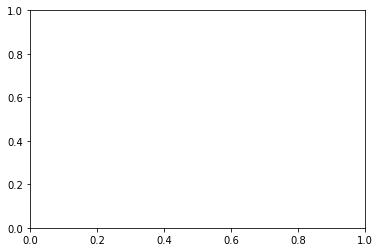

In [58]:
x = pd.read_csv("train.csv")
y = x['GrLivArea']
legend = ['Sale Price','GrLivArea']
colors = ("red", "green")
score_pk = x['GrLivArea']
 
# Plot
plt.scatter(x, y, score_pk, color=['red', 'blue'])
plt.title('Scatter plot pythonspot.com')
plt.xlabel("Sale Price")
plt.ylabel("GrLivArea")
plt.legend(legend)
plt.title('house_price')
plt.show()
